In [38]:
import random
from scipy.stats import skewnorm

In [39]:
# Define constants
n_owners = 2856.86 * 1000 # Number of e-bike owners in 2023
n = 1796

t_att = 1063 # Number of trips that would have been taken by active transportation or transit
t_car = 1778 # Number of trips that would have been taken by automobile
t_no = 987 # Number of trips that wouldn't have been taken

d_att = 9.4 # Sample mean distance of trips that would have been taken by active transportation or transit
d_car = 9.3 # Sample mean distance of trips that would have been taken by automobile
d_no = 14.3 # Sample mean distance of trips that would not have been taken

sigma_att = 10 # Standard deviation of distance of trips that would have been taken by active transportation or transit
sigma_car = 10 # Standard deviation of distance of trips that would have been taken by automobile
sigma_no = 10 # Standard deviation of distance of trips that would not have been taken

p_daily = 0.492 # Proportion of electric bike owners who take an e-bike trip daily
p_weekly = 0.423 # Proportion of electric bike owners who take an e-bike trip once a week
p_monthly = 0.058 # Proportion of electric bike owners who take an e-bike trip monthly
p_fewyearly = 0.018 # Proportion of electric bike owners who take an e-bike trip a few times a year
p_never = 0.009 # Proportion of electric bike owners who have never taken an e-bike trip

# Simple mean of g CO2/mi produced for modes of transport included in active 
# transportation or transit (walking, biking, trains, light rail/metro, buses)
emissions_att = ((0 + 21 + 50 + 75 + 111) / 5) / 0.621371

emissions_car = 271 / 0.621371 # g CO2/mi travelled produced by automobiles

emissions_ebike = 22 / 0.621371 # g CO2/mi travelled produced by e-bikes

# Trials of the simulation
trials = 10000

skew = 3

In [40]:
# Define computed values
t = t_att + t_car + t_no # Total number of trips taken

p_att = t_att / t # Proportion of trips that would have been taken by active transportation or transit
p_car = t_car / t # Proportion of trips that would have been taken by automobile
p_no = t_no / t # Proportion of trips that would not have been taken

# Distances sampled from a normal distribution using sample mean and standard deviation
dist_d_att, drawn_att = skewnorm.rvs(a=skew, loc=d_att, scale=sigma_att, size=trials * 24 * 365), 0
dist_d_car, drawn_car = skewnorm.rvs(a=skew, loc=d_car, scale=sigma_car, size=trials * 24 * 365), 0
dist_d_no, drawn_no = skewnorm.rvs(a=skew, loc=d_no, scale=sigma_no, size=trials * 24 * 365), 0

# Average number of e-bike trips an e-bike owner takes per year
t_avg = 365 * p_daily + 52 * p_weekly + 12 * p_monthly + 3 * p_fewyearly + 0 * p_never

p_t_hourly = t_avg / (365 * 24) # Probability of a trip being taken at any given hour for an e-bike owner

In [41]:
result_diff = []
for x in range(trials): # Trials of simulation
    # Miles driven in this simulation by active transportation or transit, by car, and by e-bike respectively
    miles_att, miles_car, miles_ebike = 0, 0, 0

    for hour in range(365 * 24): # For each hour of the year
        # We take a e-bike trip during this hour with the probability p_t_hourly
        if random.random() > p_t_hourly:
            continue

        type_of_trip = random.random()

        # Take one of three types of e-bike trips:
        # 1. A trip that would have been taken by active transportation or transit (p = p_att)
        # 2. A trip that would have been taken by automobile (p = p_car)
        # 3. A trip that would not have been taken (p = p_att)

        if type_of_trip < p_att: # Active transportation or transit trip
            # Draw distance from a normal distribution using the sample mean and standard deviation
            d = dist_d_att[drawn_att]
            drawn_att += 1

            miles_att += d
            miles_ebike += d
        elif p_att <= type_of_trip < p_att + p_car: # Automobile trip
            d = dist_d_car[drawn_car]
            drawn_car += 1

            miles_car += d
            miles_ebike += d
        else: # Trip that would not have been taken
            d = dist_d_no[drawn_no]
            drawn_no += 1

            miles_ebike += d
    
    # Total CO2 that would have generated without an e-bike
    co2_no_ebike = miles_att * emissions_att + miles_car * emissions_car

    # Total CO2 generated with e-bike
    co2_ebike = miles_ebike * emissions_ebike

    result_diff.append(co2_no_ebike - co2_ebike)


In [42]:
import seaborn as sns
import pandas as pd
import numpy as np

[Text(0.5, 0, 'Tons of CO2 mitigated'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Simulated Tons of CO2 Mitigated')]

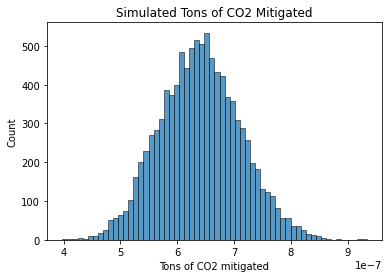

In [47]:
# Convert grams to metric tons
result_diff = np.array(result_diff) / 1000000
image = sns.histplot(data=result_diff)
image.set(xlabel="Tons of CO2 mitigated", ylabel="Count", title="Simulated Tons of CO2 Mitigated")

<AxesSubplot:ylabel='Count'>

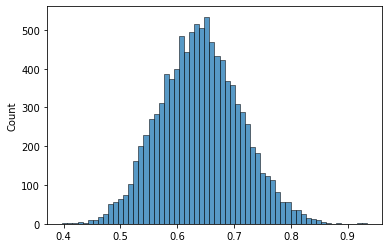